1. CEL PROJEKTU

Celem projektu jest stworzenie optymalnego modelu nauczania maszynowego dla klienta w postaci banku internetowego. Model słuyć ma do predykcji zainteresowania klienta kupnem produktu w postaci lokaty bankowej. Problem jaki projekt ma na celu rozwiązać to
optymalizacja kosztów połączeń telefonicznych. Dzięki temu modelowi bank będzie dzwonił do klientów realnie zainteresowanych produktem, dzięki czemu zaoszczędzi środki pienięne, ktre zostały by utracone na bezsensowne połączenia telefoniczne do klientów
nie wykazujących zainteresowania proponowanym produktem finansowym.

2. POZYSKANIE DANYCH

Projekt będzie realizowany na danych "Bank Term Deposit Predictions" pochodzących z serwisu Kaggle. Dane będą modelowane za pomocą algorytmów uczenia maszynowego wykorzystujących nauczanie z nadzorem.

3. WSTEPNA OCENA PRZYDATNOSCI DANYCH

Dane zawierają komplet informacji o kliencie, takiech jak: Wiek, Sektor zatrudnienia, Stan cywilny, Stopień wyedukowania, Posiadanie zdolności kredytowej, Stan zamieszkania, Posiadane zadłuenie,
Preferowany typ kontaktu, Ostatni miesiac kontaktu, Ostatni dzien kontaktu, Dlugosc ostatniej rozmowy, Liczbe polaczen przy ostatniej kampani marketingowej, Liczba dni od ostatniego kontaktu,
Liczba polaczen przed ostatnia kampania marketingowa, Wynik ostatniej kampanii marketingowej.

Wydaje mi sie, ze dane zawieraja wszystkie niezbedne dane do przeprowadzenia eksperymentu.

4. PRZYGOTOWANIE DANYCH

Importy

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

Wczytuję dane do DataFrame

In [170]:
data = pd.read_csv('train.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


W pierwszej klejnosci sprawdzmy czy dane zawieraja jakies wartosci brakujace

In [171]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Sprawdzmy teraz czy dane zawieraja jakies puste komorki nie zdefiniowane jako null

In [172]:
data[data['age'] == ' ']
data[data['job'] == ' ']
data[data['marital'] == ' ']
data[data['education'] == ' ']
data[data['default'] == ' ']
data[data['balance'] == ' ']
data[data['housing'] == ' ']
data[data['loan'] == ' ']
data[data['contact'] == ' ']
data[data['day'] == ' ']
data[data['month'] == ' ']
data[data['duration'] == ' ']
data[data['campaign'] == ' ']
data[data['pdays'] == ' ']
data[data['previous'] == ' ']
data[data['poutcome'] == ' ']
data[data['y'] == ' ']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


Zweryfikujmy dane dla kazdej zmiennej i ocenmy czy sa przydatne do modelu

AGE
Sprawdzam wartosci, sprawdzam maksymalna oraz najmniejsza wartosc w poszukiwaniu bledow wieku

In [173]:
data['age'].value_counts()
data['age'].min() #18
data['age'].max() #95

95

JOB

In [174]:
data['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Tutaj mamy troche danych unknown, ale moze miec to wplyw na model, wiec nie ruszam tego.
Literowka w nazwie admin. Usuwam kropke

In [175]:
data['job'].replace('admin.', 'admin', inplace=True)

MARITAL

In [176]:
data['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

EDUCATION

In [177]:
data['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Tutaj rowniez na razie zostawiam wartosci unknown

DEFAULT

In [178]:
data['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

HOUSING

In [179]:
data['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

LOAN

In [180]:
data['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

CONTACT

In [181]:
data['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

MONTH

In [182]:
data['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

DAY

In [183]:
data['day'].value_counts()
data['day'].max()
data['day'].min()

1

DURATION

In [184]:
data['duration'].value_counts()
data['duration'].min()

0

CAMPAIGN

In [185]:
data['campaign'].value_counts()
data['campaign'].min()

1

PDAYS

In [186]:
data['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

-1 to wartosc poprawna

PREVIOUS

In [187]:
data['previous'].value_counts()

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

POUTCOME

In [188]:
data['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

Y

In [189]:
data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

Zmienmy typy danych z object na czytelniejsze dla jezyka programowania

In [190]:
data['job'] = data['job'].astype('string')
data['marital'] = data['marital'].astype('string')
data['education'] = data['education'].astype('string')
data['default'] = data['default'].astype('string')
data['housing'] = data['housing'].astype('string')
data['loan'] = data['loan'].astype('string')
data['contact'] = data['contact'].astype('string')
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

Teraz nalezy zamienic dane kategoryczne na dane numeryczne, czytelne dla dalszej analityki oraz budowania modelu

In [191]:
data['job'].replace("admin", "1", inplace = True)
data['job'].replace("blue-collar", "2", inplace = True)
data['job'].replace("entrepreneur", "3", inplace = True)
data['job'].replace("housemaid", "4", inplace = True)
data['job'].replace("management", "5", inplace = True)
data['job'].replace("retired", "6", inplace = True)
data['job'].replace("self-employed", "7", inplace = True)
data['job'].replace("services", "8", inplace = True)
data['job'].replace("student", "9", inplace = True)
data['job'].replace("technician", "10", inplace = True)
data['job'].replace("unemployed", "11", inplace = True)
data['job'].replace("unknown", "12", inplace = True)
data['job'] = data['job'].astype(int)
data['job'].value_counts()

job
2     9732
5     9458
10    7597
1     5171
8     4154
6     2264
7     1579
3     1487
11    1303
4     1240
9      938
12     288
Name: count, dtype: int64

In [192]:
data['marital'].replace('divorced', '1', inplace=True)
data['marital'].replace('married', '2', inplace=True)
data['marital'].replace('single', '3', inplace=True)
data['marital'].replace('unknown', '3', inplace=True)
data['marital'] = data['marital'].astype(int)
data['marital'].value_counts()

marital
2    27214
3    12790
1     5207
Name: count, dtype: int64

In [193]:
data['education'].replace('secondary', '1', inplace=True)
data['education'].replace('tertiary', '2', inplace=True)
data['education'].replace('primary', '3', inplace=True)
data['education'].replace('unknown', '4', inplace=True)
data['education'] = data['education'].astype(int)
data['education'].value_counts()

education
1    23202
2    13301
3     6851
4     1857
Name: count, dtype: int64

In [194]:
data['default'].replace("no", "0", inplace=True)
data['default'].replace("yes", "1", inplace=True)
data['default'] = data['default'].astype(int)
data['default'].value_counts()

default
0    44396
1      815
Name: count, dtype: int64

In [195]:
data['housing'].replace("no", "0", inplace=True)
data['housing'].replace("yes", "1", inplace=True)
data['housing'] = data['housing'].astype(int)
data['housing'].value_counts()

housing
1    25130
0    20081
Name: count, dtype: int64

In [196]:
data['loan'].replace("no", "0", inplace=True)
data['loan'].replace("yes", "1", inplace=True)
data['loan'] = data['loan'].astype(int)
data['loan'].value_counts()

loan
0    37967
1     7244
Name: count, dtype: int64

In [197]:
data['contact'].replace("cellular", "1", inplace=True)
data['contact'].replace("unknown", "2", inplace=True)
data['contact'].replace("telephone", "3", inplace=True)
data['contact'] = data['contact'].astype(int)
data['contact'].value_counts()

contact
1    29285
2    13020
3     2906
Name: count, dtype: int64

In [198]:
data['month'].replace("jan", "1", inplace=True)
data['month'].replace("feb", "2", inplace=True)
data['month'].replace("mar", "3", inplace=True)
data['month'].replace("apr", "4", inplace=True)
data['month'].replace("may", "5", inplace=True)
data['month'].replace("jun", "6", inplace=True)
data['month'].replace("jul", "7", inplace=True)
data['month'].replace("aug", "8", inplace=True)
data['month'].replace("sep", "9", inplace=True)
data['month'].replace("oct", "10", inplace=True)
data['month'].replace("nov", "11", inplace=True)
data['month'].replace("dec", "12", inplace=True)
data['month'] = data['month'].astype(int)
data['month'].value_counts()

month
5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: count, dtype: int64

In [200]:
data['poutcome'].replace('unknown', '1', inplace=True)
data['poutcome'].replace('failure', '2', inplace=True)
data['poutcome'].replace('other', '3', inplace=True)
data['poutcome'].replace('success', '4', inplace=True)
data['poutcome'] = data['poutcome'].astype(int)
data['poutcome'].value_counts()

poutcome
1    36959
2     4901
3     1840
4     1511
Name: count, dtype: int64

In [202]:
data['y'].replace('no', '0', inplace=True)
data['y'].replace('yes', '1', inplace=True)
data['y'] = data['y'].astype(int)
data['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

Sprawdzmy wartosci odstajace.

In [207]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,2,2,0,2143,1,0,2,5,5,261,1,-1,0,1,0
1,44,10,3,1,0,29,1,0,2,5,5,151,1,-1,0,1,0
2,33,3,2,1,0,2,1,1,2,5,5,76,1,-1,0,1,0
3,47,2,2,4,0,1506,1,0,2,5,5,92,1,-1,0,1,0
4,33,12,3,4,0,1,0,0,2,5,5,198,1,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,2,2,0,825,0,0,1,17,11,977,3,-1,0,1,1
45207,71,6,1,3,0,1729,0,0,1,17,11,456,2,-1,0,1,1
45208,72,6,2,1,0,5715,0,0,1,17,11,1127,5,184,3,4,1
45209,57,2,2,1,0,668,0,0,3,17,11,508,4,-1,0,1,0


{'whiskers': [<matplotlib.lines.Line2D at 0x281216c10>,
 'caps': [<matplotlib.lines.Line2D at 0x281216510>,
 'boxes': [<matplotlib.lines.Line2D at 0x281310450>],
 'medians': [<matplotlib.lines.Line2D at 0x281134ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2811357d0>],
 'means': []}

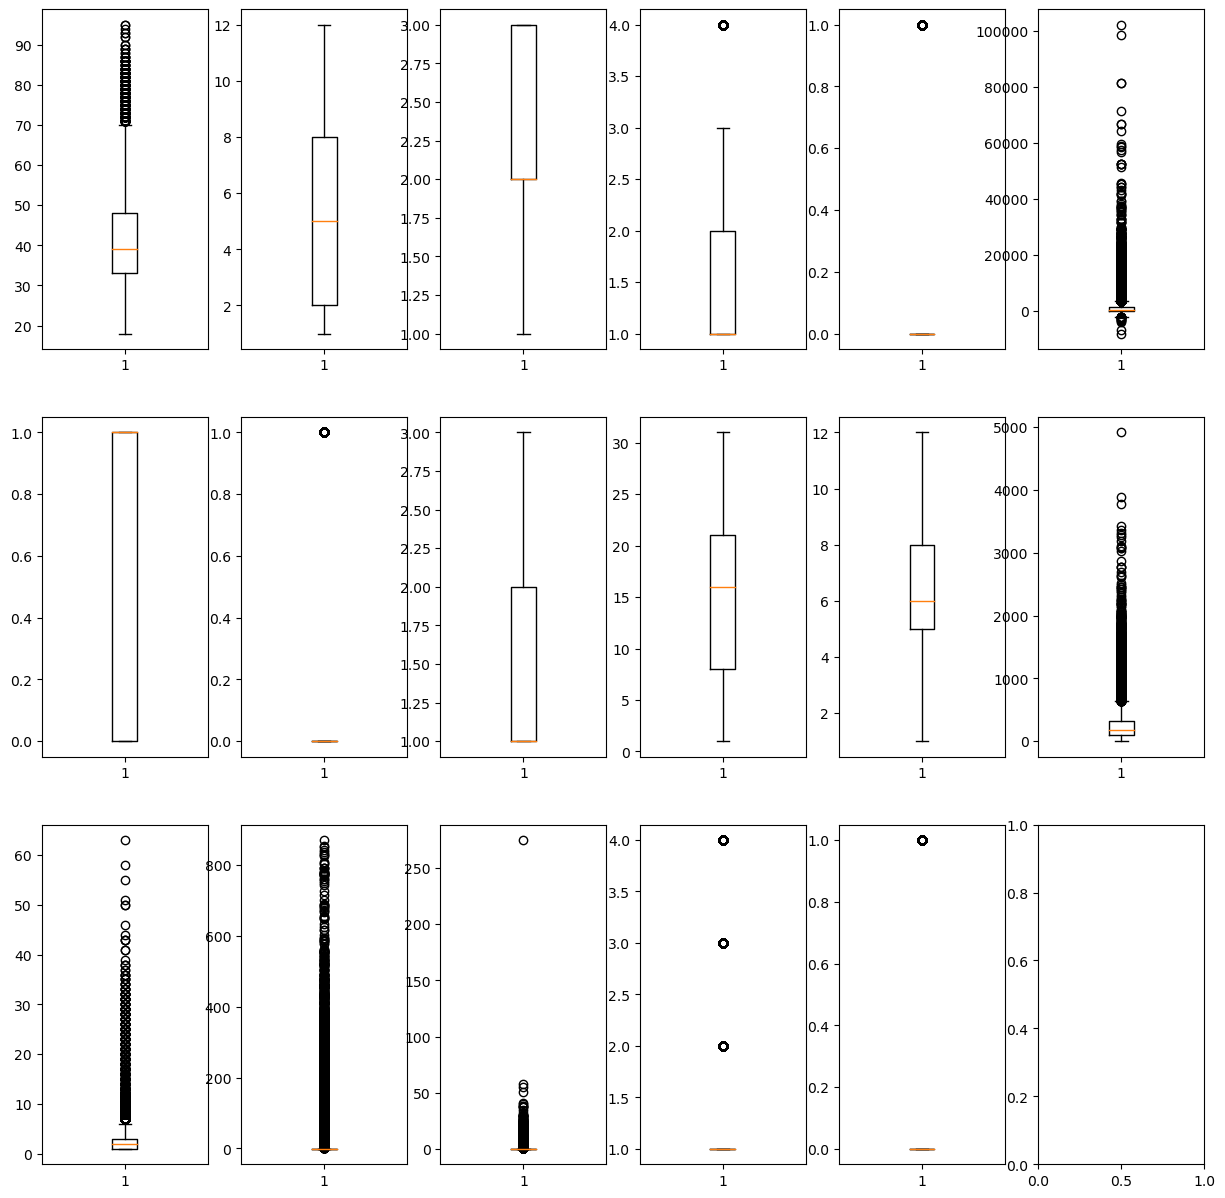

In [208]:
fig, axs = plt.subplots(3, 6)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0,0].boxplot(data['age'])
axs[0,1].boxplot(data['job'])
axs[0,2].boxplot(data['marital'])
axs[0,3].boxplot(data['education'])
axs[0,4].boxplot(data['default'])
axs[0,5].boxplot(data['balance'])
axs[1,0].boxplot(data['housing'])
axs[1,1].boxplot(data['loan'])
axs[1,2].boxplot(data['contact'])
axs[1,3].boxplot(data['day'])
axs[1,4].boxplot(data['month'])
axs[1,5].boxplot(data['duration'])
axs[2,0].boxplot(data['campaign'])
axs[2,1].boxplot(data['pdays'])
axs[2,2].boxplot(data['previous'])
axs[2,3].boxplot(data['poutcome'])
axs[2,4].boxplot(data['y'])

Wartosci odstajace widac w: age, default, balance, education, loan, duration, campaign, pdays, previous, poutcome, y
Przeanalizujmy je po kolei

{'whiskers': [<matplotlib.lines.Line2D at 0x280e81c90>,
 'caps': [<matplotlib.lines.Line2D at 0x280e83ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2810d28d0>],
 'medians': [<matplotlib.lines.Line2D at 0x280e82d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x281d32410>],
 'means': []}

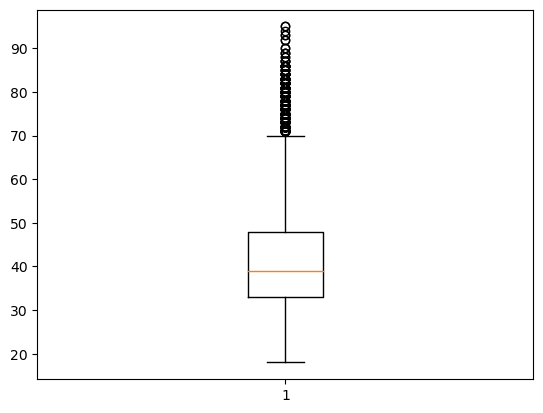

In [209]:
plt.boxplot(data['age'])

Widac wartosci odstajace powyzej 70 roku zycia. To wiek, tu nie ma co usuwac. Zostawiam jak jest.

default
0    44396
1      815
Name: count, dtype: int64

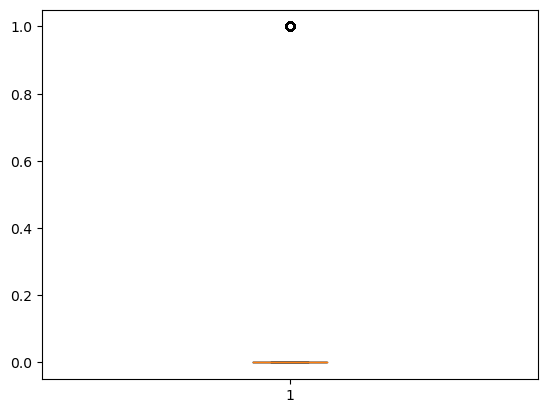

In [212]:
plt.boxplot(data['default'])
data['default'].value_counts()

To dlatego, ze wartosci 1 jest malo. Wazna informacja, zostawiam

balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64

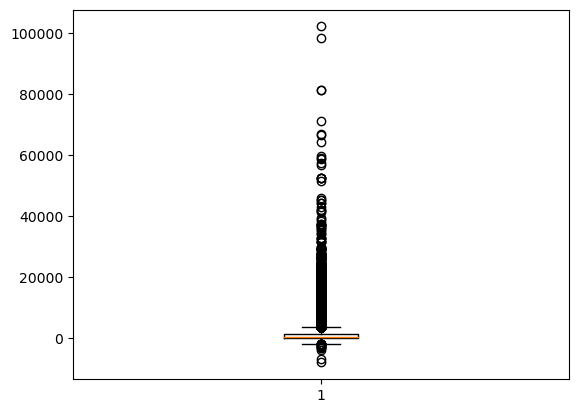

In [214]:
plt.boxplot(data['balance'])
data['balance'].value_counts()

Taki rozrzut wynika z roznego stanu rachunkow klientow. Skrajne przypadki to debety oraz bardzo wysokie majatki. Z reguly ludziom z zadluzeniami bank nie udziela zadnych promocyjnych produktow.
Ci ludzie raczej nie ulokuja srodkow w lokacie. Usuwam wartosci ponizej 0

In [220]:
data = data[data['balance'] > 0]

education
1    19171
2    11455
3     5707
4     1598
Name: count, dtype: int64

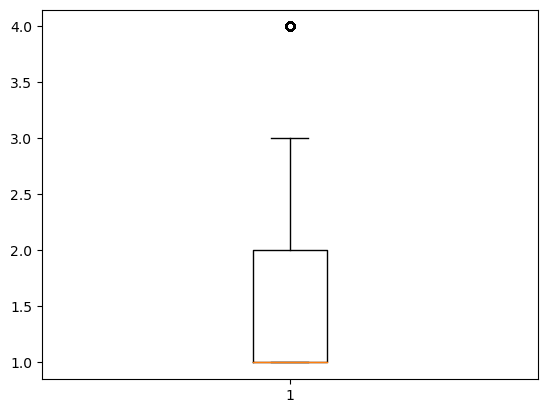

In [222]:
plt.boxplot(data['education'])
data['education'].value_counts()

Tutaj wartosc odstajaca stanowi education unknown. Mozemy usunac dla lepszego modelu. Nie stanowi to duzej ilosci danych

In [225]:
data = data[data['education'] != 4]

loan
0    30949
1     5384
Name: count, dtype: int64

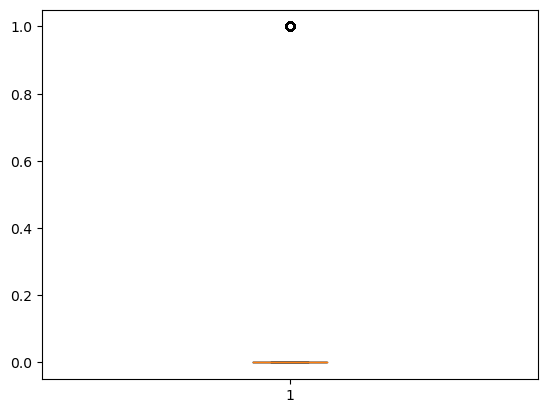

In [230]:
plt.boxplot(data['loan'])
data['loan'].value_counts()

Wynika z mniejscesz ilosci danych binarnych. Zostawiam

{'whiskers': [<matplotlib.lines.Line2D at 0x1753a6710>,
 'caps': [<matplotlib.lines.Line2D at 0x1753a5ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x280ad75d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1753a5190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1753a7210>],
 'means': []}

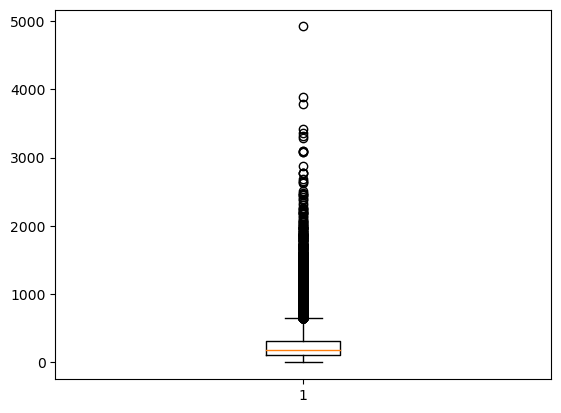

In [231]:
plt.boxplot(data['duration'])

Dlugosc rozmowy, zostawiam

campaign
1     14231
2     10005
3      4463
4      2832
5      1424
6      1010
7       586
8       435
9       258
10      205
11      159
12      116
13       97
14       75
15       64
16       56
17       48
18       41
19       35
20       32
21       28
25       17
24       15
22       14
23       11
29       10
28        9
26        8
30        7
32        7
31        7
27        6
33        4
36        2
34        2
35        2
50        2
41        2
37        1
46        1
58        1
38        1
55        1
39        1
44        1
51        1
Name: count, dtype: int64

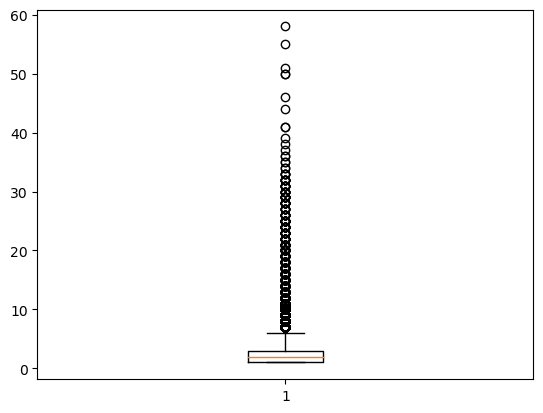

In [233]:
plt.boxplot(data['campaign'])
data['campaign'].value_counts()

Ta kolumne uwazam za calkowicie zbedna. Usunmy ja. Ilosc polaczen z klientem jest raczej malo znaczacym atrybutem.

In [235]:
data.drop(columns='campaign', inplace=True)

KeyError: "['campaign'] not found in axis"

pdays
-1      29308
 182      142
 92       128
 183      115
 91       111
        ...  
 421        1
 480        1
 585        1
 467        1
 530        1
Name: count, Length: 545, dtype: int64

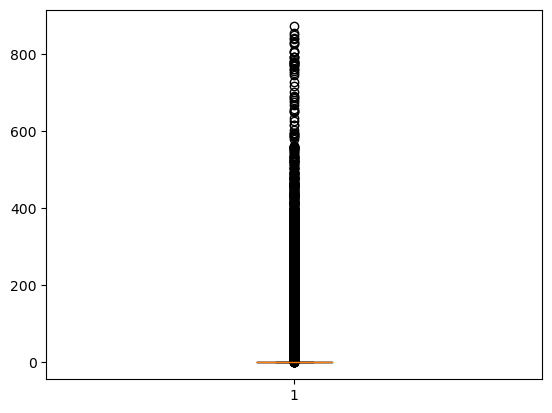

In [237]:
plt.boxplot(data['pdays'])
data['pdays'].value_counts()

Ta kolumna rowniez zawiera jednostki czasu od ostatniego kontaktu. Do usuniecia, taki atrybut jest zbedny

In [238]:
data.drop(columns='pdays', inplace=True)

previous
0      29308
1       2355
2       1771
3        973
4        627
5        394
6        235
7        176
8        111
9         75
10        60
11        51
12        37
13        32
14        16
15        15
17        13
16        12
19        11
23         7
20         6
22         6
24         5
21         4
27         4
29         4
18         4
30         3
25         3
37         2
26         2
28         2
51         1
275        1
38         1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

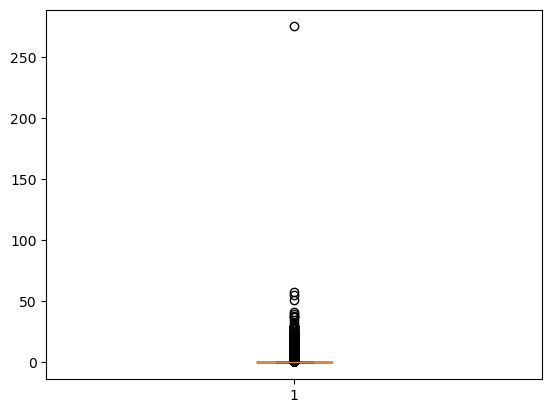

In [240]:
plt.boxplot(data['previous'])
data['previous'].value_counts()

To samo jak wyzej. Liczba telefonow do klienta

In [241]:
data.drop(columns='previous', inplace=True)

poutcome
1    29313
2     4129
3     1542
4     1349
Name: count, dtype: int64

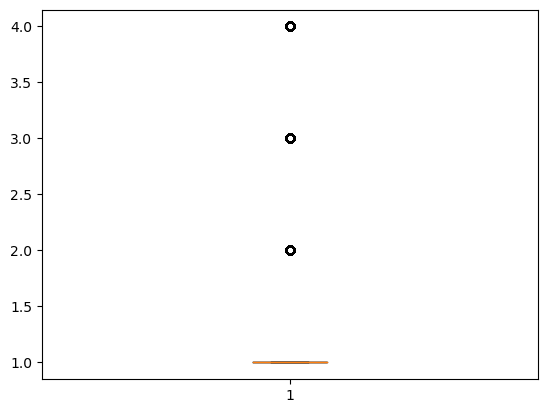

In [243]:
plt.boxplot(data['poutcome'])
data['poutcome'].value_counts()

To jest wazny atrybut. Reakcja na poprzednia kampanie. Zostawiam

y
0    31790
1     4543
Name: count, dtype: int64

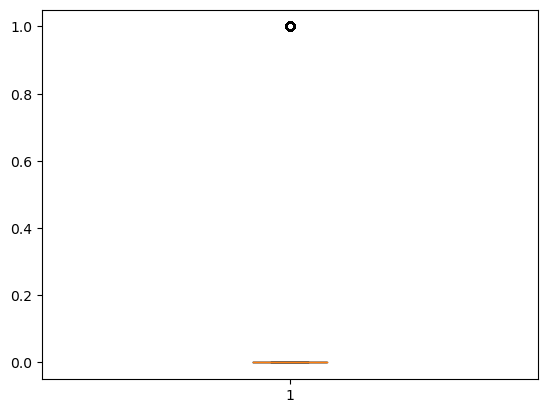

In [245]:
plt.boxplot(data['y'])
data['y'].value_counts()

Zmienna binarna, zostawiam

Zaktualizujmy indexy

In [246]:
data.reset_index
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,y
0,58,5,2,2,0,2143,1,0,2,5,5,261,1,0
1,44,10,3,1,0,29,1,0,2,5,5,151,1,0
2,33,3,2,1,0,2,1,1,2,5,5,76,1,0
5,35,5,2,2,0,231,1,0,2,5,5,139,1,0
6,28,5,3,2,0,447,1,1,2,5,5,217,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,2,2,0,825,0,0,1,17,11,977,1,1
45207,71,6,1,3,0,1729,0,0,1,17,11,456,1,1
45208,72,6,2,1,0,5715,0,0,1,17,11,1127,4,1
45209,57,2,2,1,0,668,0,0,3,17,11,508,1,0
